In [28]:
import numpy as np
import pandas as pd



import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from datetime import date, time, datetime, timedelta 
import calendar
import glob
import folium 

%matplotlib inline

In [34]:
csv_files = glob.glob('Datasets/RideIndego 2016/*.csv')
df1 = pd.concat([pd.read_csv(f) for f  in csv_files], ignore_index = True)

## Including further Status Information

In [29]:
df = pd.read_csv(r"C:\Users\ntpec\Downloads\indego-stations-2021-01-01.csv")

In [4]:
#convert to datetime so that we can manipulate the dates
df["Go_live_date"] = pd.to_datetime(df["Go_live_date"])
df

,Station_ID,Station_Name,Go_live_date,Status
0,3000,Virtual Station,2015-04-23,Active
1,3004,Municipal Services Building Plaza,2015-04-23,Active
2,3005,"Welcome Park, NPS",2015-04-23,Active
3,3006,40th & Spruce,2015-04-23,Active
4,3007,"11th & Pine, Kahn Park",2015-04-23,Active
...,...,...,...,...
152,3211,Corinthian & Poplar,2020-02-06,Active
153,3212,Schuylkill Banks Pergola,2020-10-09,Active
154,3213,Broad & Carpenter,2020-09-16,Active
155,3214,Broad & Cecil B Moore,2020-09-22,Active


In [5]:
#we are looking for nan values 
df.isna().sum()

Station_ID      0
Station_Name    0
Go_live_date    0
Status          0
dtype: int64

In [6]:
#picking out the information for 2016
Station_2016 = df[df["Go_live_date"].isin(pd.date_range("2016-01-01", "2016-12-31"))]

In [7]:
#sorting the data ascending
Station_2016.sort_values(by='Go_live_date')

,Station_ID,Station_Name,Go_live_date,Status
105,3124,Race Street Pier,2016-03-31,Active
106,3125,15th & South,2016-04-08,Active
98,3117,ParkWest Town Center,2016-04-15,Active
100,3119,42nd & Lancaster,2016-04-25,Active
99,3118,"46th Street Station, MFL",2016-04-25,Active
102,3121,27th & Girard,2016-04-26,Active
101,3120,31st & Girard,2016-04-26,Active
104,3123,22nd & Cecil B. Moore,2016-04-27,Active
103,3122,"24th & Cecil B. Moore, Cecil B. Moore Library",2016-04-27,Inactive
75,3093,33rd & Diamond,2016-04-28,Active


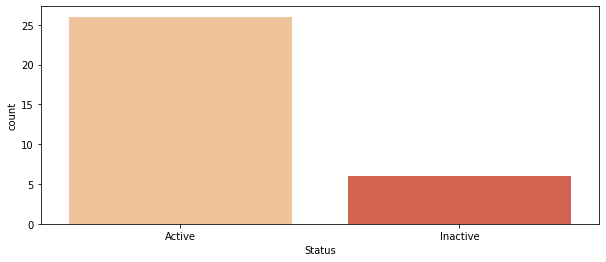

Text(0.5, 1.0, 'Numbers of avaible and unavaible Stations')

In [76]:
f, ax = plt.subplots(1, sharey=True, figsize=(10, 4))
#countplots
sns.countplot(x="Status",data= Station_2016,palette="OrRd")

plt.show()


In [73]:

Station_2016["month"] = Station_2016["Go_live_date"].apply(lambda dt: dt.month)
Station_2016["weekday"] = Station_2016["Go_live_date"].apply(lambda dt: dt.dayofweek)

In [11]:
Station_2016

,Station_ID,Station_Name,Go_live_date,Status,month,weekday
75,3093,33rd & Diamond,2016-04-28,Active,4,3
76,3095,29th & Diamond,2016-04-28,Inactive,4,3
77,3096,29th & Dauphin,2016-04-29,Active,4,4
78,3097,"Berks Station, MFL",2016-04-29,Active,4,4
79,3098,10th & Federal,2016-05-02,Active,5,0
80,3099,4th & Washington,2016-05-02,Active,5,0
81,3100,Moyamensing & Tasker,2016-05-02,Active,5,0
82,3101,11th & South,2016-05-02,Active,5,0
83,3102,Pennsylvania & Fairmount Perelman Building,2016-05-03,Active,5,1
84,3103,"27th & Master, Athletic Recreation Center",2016-05-03,Inactive,5,1


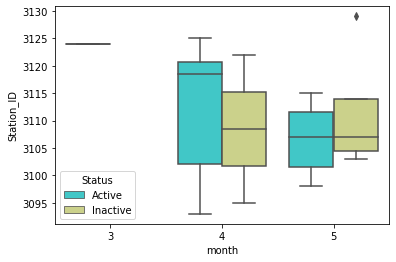

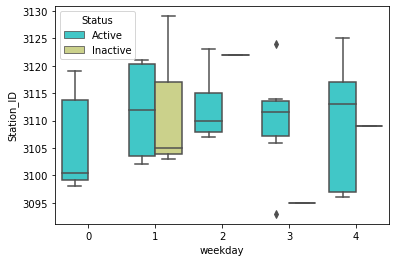

In [27]:
sns.boxplot(x="month",y="Station_ID", data= Station_2016 ,palette="rainbow", hue="Status")
plt.show()
sns.boxplot(x="weekday",y="Station_ID", data= Station_2016 ,palette="rainbow", hue="Status")
plt.show()


In [25]:
#picking out the unavaible stations
Station_2016.loc[Station_2016['Status'] == "Inactive"]

,Station_ID,Station_Name,Go_live_date,Status,month,weekday
76,3095,29th & Diamond,2016-04-28,Inactive,4,3
84,3103,"27th & Master, Athletic Recreation Center",2016-05-03,Inactive,5,1
86,3105,Penn Treaty Park,2016-05-03,Inactive,5,1
90,3109,Parkside & Girard,2016-05-06,Inactive,5,4
103,3122,"24th & Cecil B. Moore, Cecil B. Moore Library",2016-04-27,Inactive,4,2
107,3129,"The Children's Hospital of Philadelphia, Osler...",2016-05-24,Inactive,5,1


### Visualize unavaible stations in a Map

In [74]:
#df2 = pd.concat([df1, Station_2016])
#df2.loc[df2["start_station_id"]== 3095]
#df2.loc[df2["start_station_id"]== 3103]
#df2.loc[df2["start_station_id"]== 3105]
#df2.loc[df2["start_station_id"]== 3109]
#df2.loc[df2["start_station_id"]== 3122]
#df2.loc[df2["start_station_id"]== 3129]

In [70]:
m = folium.Map(location=[39.952583,-75.165222], zoom_start = 13) 
tooltip = "29th & Diamond"
tooltip1 = "27th & Master, Athletic Recreation Center"
tooltip2 = "Penn Treaty Park"
tooltip3 = "Parkside & Girard"
tooltip4 = "24th & Cecil B. Moore, Cecil B. Moore Library"
tooltip5 = "The Children's Hospital of Philadelphia, Osler..."
folium.Marker(
    [39.987709, -75.1805], popup="UNAVAIBLE", tooltip=tooltip
    
).add_to(m)
folium.Marker(
    [39.977139, -75.179398], popup="UNAVAIBLE", tooltip=tooltip1
    
).add_to(m)

folium.Marker(
    [39.966518, -75.129959], popup="UNAVAIBLE", tooltip=tooltip2
    
).add_to(m)
folium.Marker(
    [39.974861, -75.205238], popup="UNAVAIBLE", tooltip=tooltip3
    
).add_to(m)
folium.Marker(
    [39.980621, -75.1735], popup="UNAVAIBLE", tooltip=tooltip4
    
).add_to(m)
folium.Marker(
    [39.946812, -75.193108], popup="UNAVAIBLE", tooltip=tooltip5
    
).add_to(m)

In [71]:
m